<a href="https://colab.research.google.com/github/huynhhoanghuy/MS_text_mining_check_available_code_of_paper/blob/main/check_code_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Họ và tên: Huỳnh Hoàng Huy

# MSHV: 21C11011

# Bài tập 1:

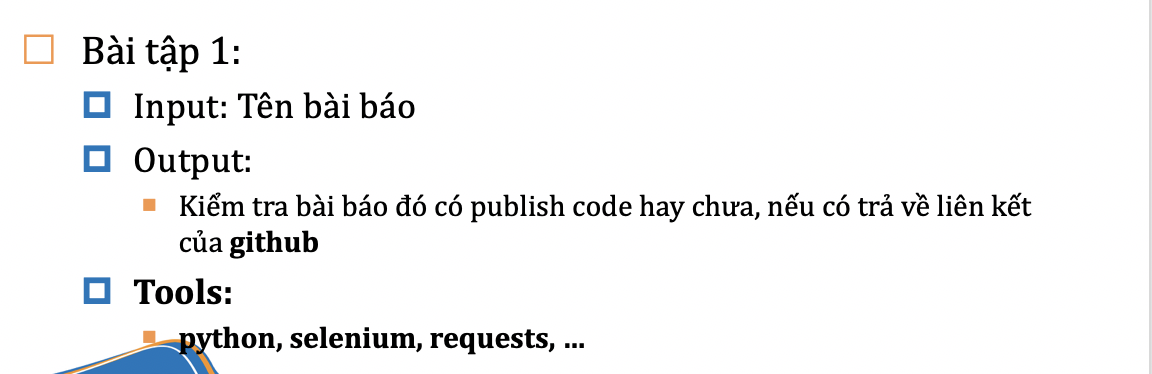

---------------------------------------------------------------

In [1]:
!pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----------------------------

Input the name of publication

In [2]:
publication_name = input("Please input the keyword for searching: ")

Please input the keyword for searching: GCN depth


Refine publication_name

In [3]:
import re
def refine_publication_name(name):
  name = " ".join(name.split())
  name = re.sub('[^A-Za-z0-9 ]+', '', name)
  return name

publication_name = refine_publication_name(publication_name)
print(publication_name)

GCN depth


Search on google and get top3 results.

If no results are github page, return False

Else, check content in that link: Are there author's names, paper's name, paper's link? 

In [4]:
from serpapi import GoogleSearch

params = {
  "api_key": "351275e61aedaaceaacef3ea1f5d4b080e8b045d28f06a74a241e74eedfbaffa",
  "engine": "google",
  "q": "*",
  "location": "Austin, Texas, United States",
  "google_domain": "google.com",
  "gl": "us",
  "hl": "en",
  "as_sitesearch": "github.com"
}

params["q"] = publication_name

search = GoogleSearch(params)
results = search.get_dict()

for result in results["organic_results"]:
  print(f"Title: {result['title']}\nSummary: {result['snippet']}\nLink: {result['link']}\n")

#get top 3:

top3_result=results["organic_results"][0:3]

https://serpapi.com/search
Title: ArminMasoumian/GCNDepth: Self-Supervised CNN-GCN ...
Summary: Self-Supervised CNN-GCN Autoencoder. GCNDepth: Self-supervised monocular depth estimation based on graph convolutional network.
Link: https://github.com/ArminMasoumian/GCNDepth

Title: tkipf/keras-gcn: Keras implementation of Graph ... - GitHub
Summary: Deep Learning on Graphs with Keras. Keras-based implementation of graph convolutional networks for semi-supervised classification.
Link: https://github.com/tkipf/keras-gcn

Title: tkipf/gcn: Implementation of Graph Convolutional Networks in ...
Summary: Graph Convolutional Networks. This is a TensorFlow implementation of Graph Convolutional Networks for the task of (semi-supervised) classification of nodes ...
Link: https://github.com/tkipf/gcn

Title: Simple and Deep Graph Convolutional Networks - GitHub
Summary: PyTorch implementation of "Simple and Deep Graph Convolutional Networks" ... We use the same semi-supervised setting as GCN and th

In [5]:
top3_result[0]

{'position': 1,
 'title': 'ArminMasoumian/GCNDepth: Self-Supervised CNN-GCN ...',
 'link': 'https://github.com/ArminMasoumian/GCNDepth',
 'displayed_link': 'https://github.com › ArminMasoumian › GCNDepth',
 'snippet': 'Self-Supervised CNN-GCN Autoencoder. GCNDepth: Self-supervised monocular depth estimation based on graph convolutional network.',
 'snippet_highlighted_words': ['Self-supervised monocular depth estimation based on graph convolutional network'],
 'about_this_result': {'source': {'description': 'GitHub, Inc., is an Internet hosting service for software development and version control using Git. It provides the distributed version control of Git plus access control, bug tracking, software feature requests, task management, continuous integration, and wikis for every project.',
   'source_info_link': 'https://github.com/ArminMasoumian/GCNDepth',
   'security': 'secure',
   'icon': 'https://serpapi.com/searches/632ec4f87d171a98729530bc/images/c287d1070a3b9282d9b66e4217c23a95b

If the link is github page, check content of this site. 

      + If total number keyword in snippet >= 50% -> ok

In [6]:
has_github = False
backup_link = None

In [7]:
threshold = 0.5 #total number keyword in snippet >= 50% -> ok
for result in top3_result:
  word_list = publication_name.split(' ')
  len_word_list = len(word_list)
  count = 0
  if "https://github.com/" in result['link']:
    for word in word_list:
      if word in result['snippet']:
        count+=1
    if count >= count/len_word_list:
      has_github = True
      backup_link = result['link']
      break

if has_github == False:
  print("This paper doesn't have source code in github!")
else:
  print("This paper has source code in github!")
  print(backup_link)
      
      


This paper has source code in github!
https://github.com/ArminMasoumian/GCNDepth


-------------------------------------------------------------------------

End